In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
def rieman_kiri(f, a, b, n):
    h = (b-a)/n
    sigma = 0
    for i in range(0, n):
        sigma += f(a + i * h)
    return h * sigma

def rieman_kanan(f, a, b, n):
    h = (b-a)/n
    sigma = 0
    for i in range(1, n + 1):
        sigma += f(a + i * h)
    return h * sigma

def rieman_tengah(f, a, b, n):
    h = (b-a)/n
    sigma = 0
    for i in range(0, n):
        sigma += f(((a + i * h) + (a + (i + 1) * h)) / 2)
    return h * sigma

def trapesium(f,a,b,n):
    h = (b-a)/n
    sigma=0
    for i in range(0, n):
        sigma += (f(a + i * h) + f(a + ( i + 1) * h))
    return h / 2 * sigma

def simpson(f, a, b, n):
    h = (b-a)/n
    sigma = f(a) + f(b)

    for i in range(1, n):
        if i % 2 != 0:
            sigma += 4 * f(a + i * h)
        else:
            sigma += 2 * f(a + i * h)
        
    return h / 3 * sigma

def INT_215150201111011(f, a, b, n, pilihan):
    if pilihan == "rieman_kiri":
        return rieman_kiri(f, a, b, n)
    elif pilihan == "rieman_kanan":
        return rieman_kanan(f, a, b, n)
    elif pilihan == "rieman_tengah":
        return rieman_tengah(f, a, b, n)
    elif pilihan == "trapesium":
        return trapesium(f, a, b, n)
    elif pilihan == "simpson":
        return simpson(f, a, b, n)

def f(x): return 2 * x ** 2 - 7 * x ** (1/2)

if __name__ == "__main__":
    hasil_analitik = 31.15841385833824
    hasil_numerik = pd.DataFrame(columns=[
        "n", "Rki", "Rka", "RT", "Tp", "Pr", 
        "err_Rki", "err_Rka", "err_RT", "err_Tp", "err_Pr"]
        )
    for n in range(2, 21):
        hasil_numerik.loc[n] = [
            n, 
            INT_215150201111011(f, 0, 5, n, "rieman_kiri"),
            INT_215150201111011(f, 0, 5, n, "rieman_kanan"),
            INT_215150201111011(f, 0, 5, n, "rieman_tengah"),
            INT_215150201111011(f, 0, 5, n, "trapesium"),
            INT_215150201111011(f, 0, 5, n, "simpson"),
            abs(hasil_analitik - INT_215150201111011(f, 0, 5, n, "rieman_kiri")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 5, n, "rieman_kanan")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 5, n, "rieman_tengah")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 5, n, "trapesium")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 5, n, "simpson"))
        ]

In [93]:
hasil_numerik

,n,Rki,Rka,RT,Tp,Pr,err_Rki,err_Rka,err_RT,err_Tp,err_Pr
2,2.0,3.580070,89.448881,24.670801,46.514476,33.396364,27.578343,58.290467,6.487613,15.356062,2.237950
3,3.0,9.934373,67.180246,28.107254,38.557310,21.836645,21.224041,36.021832,3.051159,7.398896,9.321769
4,4.0,14.125436,57.059841,29.362438,35.592638,31.952026,17.032978,25.901427,1.795976,4.434224,0.793612
5,5.0,16.976149,51.323674,29.964023,34.149911,23.350371,14.182264,20.165260,1.194390,2.991498,7.808043
6,6.0,19.020814,47.643750,30.300738,33.332282,31.590606,12.137600,16.485336,0.857676,2.173868,0.432192
7,7.0,20.553728,45.087674,30.509203,32.820701,24.891181,10.604686,13.929260,0.649211,1.662287,6.267233
8,8.0,21.743937,43.211139,30.647763,32.477538,31.439171,9.414477,12.052725,0.510651,1.319124,0.280757
9,9.0,22.694166,41.776124,30.744844,32.235145,25.981410,8.464247,10.617710,0.413570,1.076731,5.177004
10,10.0,23.470086,40.643848,30.815690,32.056967,31.359319,7.688327,9.485435,0.342723,0.898554,0.200906
11,11.0,24.115518,39.728029,30.869093,31.921773,26.763221,7.042896,8.569615,0.289321,0.763359,4.395192


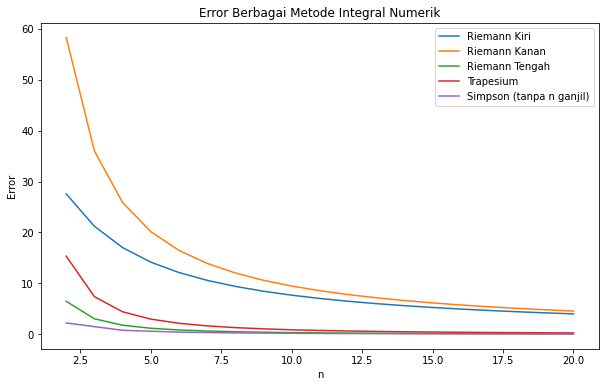

In [94]:
# err_Rki

err_Rki = hasil_numerik["err_Rki"]
err_Rka = hasil_numerik["err_Rka"]
err_RT = hasil_numerik["err_RT"]
err_Tp = hasil_numerik["err_Tp"]
err_Pr = hasil_numerik[hasil_numerik["n"] % 2 == 0]["err_Pr"]
n = hasil_numerik["n"]
n_Pr = hasil_numerik[hasil_numerik["n"] % 2 == 0]["n"]

plt.figure(figsize=(10, 6))
plt.plot(n, err_Rki, label="Riemann Kiri")
plt.plot(n, err_Rka, label="Riemann Kanan")
plt.plot(n, err_RT, label="Riemann Tengah")
plt.plot(n, err_Tp, label="Trapesium")
plt.plot(n_Pr, err_Pr, label="Simpson (tanpa n ganjil)")
plt.legend()
plt.xlabel("n")
plt.ylabel("Error")

plt.title("Error Berbagai Metode Integral Numerik")

plt.show()

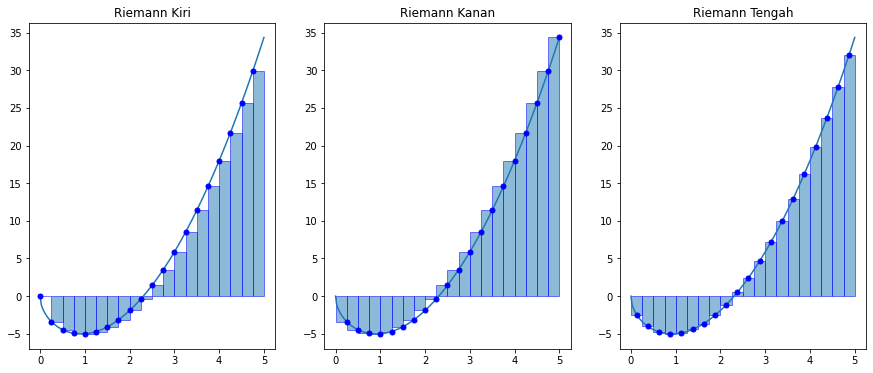

In [101]:
# Visualisasi Integral Riemman

a = 0
b = 5
n = 20

x = np.linspace(a, b, n+1)
y = f(x)

X = np.linspace(a, b, 10*n+1)
Y = f(X)

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.plot(X, Y)
x_left = x[:-1]
y_left = y[:-1]
plt.plot(x_left, y_left, 'b.', markersize=10)
plt.bar(x_left, y_left, width=(b-a)/n, alpha=0.5, align='edge', edgecolor='b')
plt.title("Riemann Kiri")

plt.subplot(1, 3, 2)
plt.plot(X, Y)
x_right = x[1:]
y_right = y[1:]
plt.plot(x_right, y_right, 'b.', markersize=10)
plt.bar(x_right, y_right, width=-(b-a)/n, alpha=0.5, align='edge', edgecolor='b')
plt.title("Riemann Kanan")

plt.subplot(1, 3, 3)
plt.plot(X, Y)
x_mid = (x[:-1] + x[1:]) / 2
y_mid = f(x_mid)
plt.plot(x_mid, y_mid, 'b.', markersize=10)
plt.bar(x_mid, y_mid, width=(b-a)/n, alpha=0.5, edgecolor='b')
plt.title("Riemann Tengah")

plt.show()

In [96]:
hasil_numerik["Rki"] = hasil_numerik["Rki"].apply(lambda x: round(x, 4))
hasil_numerik["Rka"] = hasil_numerik["Rka"].apply(lambda x: round(x, 4))
hasil_numerik["RT"] = hasil_numerik["RT"].apply(lambda x: round(x, 4))
hasil_numerik["Tp"] = hasil_numerik["Tp"].apply(lambda x: round(x, 4))
hasil_numerik["Pr"] = hasil_numerik["Pr"].apply(lambda x: round(x, 4))
hasil_numerik["err_Rki"] = hasil_numerik["err_Rki"].apply(lambda x: round(x, 4))
hasil_numerik["err_Rka"] = hasil_numerik["err_Rka"].apply(lambda x: round(x, 4))
hasil_numerik["err_RT"] = hasil_numerik["err_RT"].apply(lambda x: round(x, 4))
hasil_numerik["err_Tp"] = hasil_numerik["err_Tp"].apply(lambda x: round(x, 4))
hasil_numerik["err_Pr"] = hasil_numerik["err_Pr"].apply(lambda x: round(x, 4))

In [88]:
hasil_numerik.to_csv("hasil_numerik.csv", index=False)